### $\text{Problem 7. Advection equation system solution}$

In [91]:
from __future__ import division
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import numpy.linalg as npla
import scipy.linalg as spla

In [92]:
def u(x):
    return max(0,1-abs(x))

def w(x):
    return max(0,1-2*abs(x))

In [93]:
def laxfriedrich(lamda,h,X,T):
    '''
    Lax Friedrich's Scheme for a linear system of PDE's
    '''        
    k = lamda*h
    
    x_domain = np.arange(X[0],X[1],step=h)
    t_domain = np.arange(T[0],T[1],step=k)
    
    x_size = len(x_domain)
    t_size = len(t_domain)
    U = np.zeros((t_size,x_size))
    W = np.zeros((t_size,x_size))
    
    # use boundary condition to compute U for all t at x = -3,3
    for i in range(t_size):
        U[i][0] = 0
        U[i][-1] = 0
    
    # use initial condtion to compute U,W for all x at t = 0 
    for i in range(x_size):
        U[0][i] = u(-3+(i*h))
        W[0][i] = w(-3+(i*h))
    
    # compute using Lax Friedrich's scheme
    for i in range(1,t_size-1):
        for j in range(1,x_size-1):
            
            # compute U at time step t = (n+1)k
            U[i][j] = (1/2)*(U[i-1][j+1]+U[i-1][j-1])
            U[i][j] += (-lamda/6)*((i+1)*k-2)*(U[i-1][j+1]-U[i-1][j-1])
            U[i][j] += (-lamda/3)*((i+1)*k+1)*(W[i-1][j+1]-W[i-1][j-1])
            U[i][j] += (-k/3)*U[i-1][j]
            
            # compute W at time step t = (n+1)k
            W[i][j] = (1/2)*(W[i-1][j+1]+W[i-1][j-1])
            W[i][j] += (-lamda/6)*((i+1)*k+1)*(U[i-1][j+1]-U[i-1][j-1])
            W[i][j] += (-lamda/6)*(2*(i+1)*k-1)*(W[i-1][j+1]-W[i-1][j-1])
            W[i][j] += (k/3)*W[i-1][j]
    
    # use boundary condition to compute W for all t at x = -3,3
    for i in range(t_size):
        W[i][0] = W[i][1]
        W[i][-1] = W[i][-2]   
    
    return U,W

In [94]:
U,W = laxfriedrich(0.5,1/20,(-3,3),(0,2))

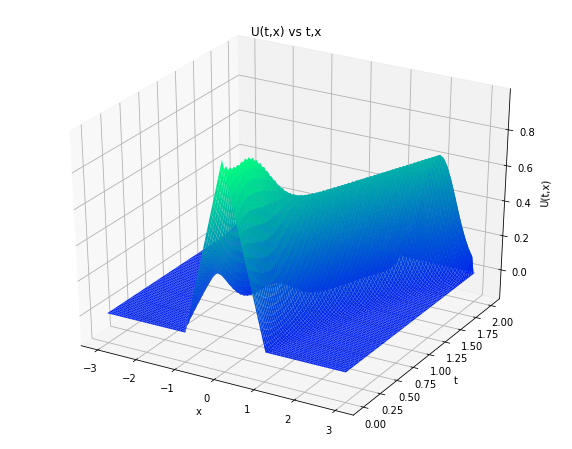

In [95]:
U = np.array(U)
space = np.linspace(-3,3,len(U[-1]))
time = np.linspace(-0,2,len(U[:,-1]))
x, t = np.meshgrid(space,time)

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')

ax.plot_surface(x, t, U,rstride=1,cstride=1,cmap='winter',edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('U(t,x)')
plt.title('U(t,x) vs t,x')
plt.show()

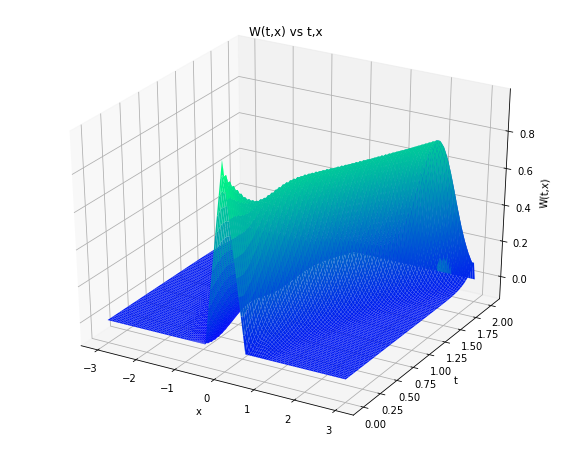

In [96]:
W = np.array(W)
space = np.linspace(-3,3,len(W[-1]))
time = np.linspace(-0,2,len(W[:,-1]))
x, t = np.meshgrid(space,time)

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')

ax.plot_surface(x, t,W,rstride=1,cstride=1,cmap='winter',edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('W(t,x)')
plt.title('W(t,x) vs t,x')
plt.show()

$\text{Ashwin Singh}$
<br/>
$2017222$